In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import pyplot as plt

<h3> Quantile Regression Model </h3>

In a regression model, one is normally interested in estimating the conditional mean of the response variable.But for some data sets, mean may not be the appropriate statistic to estimate. For Examples:</br>
1. The data are highly skewed to the left or to the right.
2. The data contains influential outliers. 

One may be better served by estimating the conditional median.

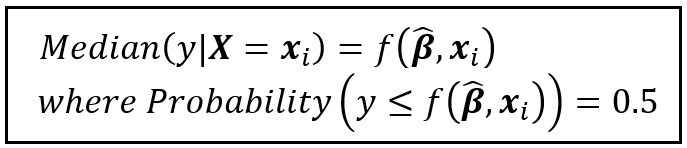

In the above equation, X is the regression matrix and x_i is the ith row of the matrix. β_cap is the vector of fitted regression coefficients and f(.) is some function of β_cap and x_i for estimating the median under the constraint that the probability of the estimated value f(β_cap,x_i) of y being greater or equal to any observed value of y is 50%.

In a data set, the median is the 0.5 quantile (or 50th percentile) point meaning that 50% of the data points are less than the value of the median. Similarly, there are other quantile points that can be defined. The 0.1 quantile point (10th percentile) is the value such that only 10% of the data set is smaller than this value. Similarly, the 0.25 quantile point is greater in value than 25% of the data set, and so on.

The general equation of such a model is as follows:

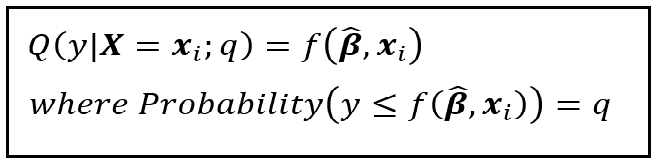

In the above equation, Q(.) is the estimated quantile point for the q-quantile (or (q*100)th percentile). As before, f(β_cap, x_i) is a function that yields the estimated value of the desired q-quantile point subject to the constraint that the probability of any observed value of y being less than or equal to the estimated value f(β_cap, x_i) is exactly q. q ranges from 0 to 1, both inclusive.

<h3> Load Dataset </h3>

In [2]:
data = pd.read_csv('dataset/automobiles_dataset_subset_uciml.csv').dropna()

In [3]:
data.head()

,make,aspiration,body_style,curb_weight,num_of_cylinders,engine_size,price
0,alfa-romero,std,convertible,2548,4,130,13495
1,alfa-romero,std,convertible,2548,4,130,16500
2,alfa-romero,std,hatchback,2823,6,152,16500
3,audi,std,sedan,2337,4,109,13950
4,audi,std,sedan,2824,5,136,17450


<h3> Problem Statement </h3>

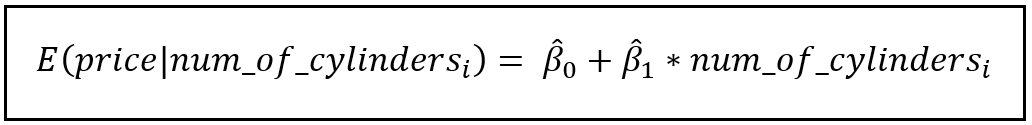

In [4]:
# Define the dependent and independent variables
y = data['price']
X = data[['num_of_cylinders']]

# Add a constant term to the independent variables (for intercept in the regression)
X = sm.add_constant(X)

<h3> Plot Dataset </h3>

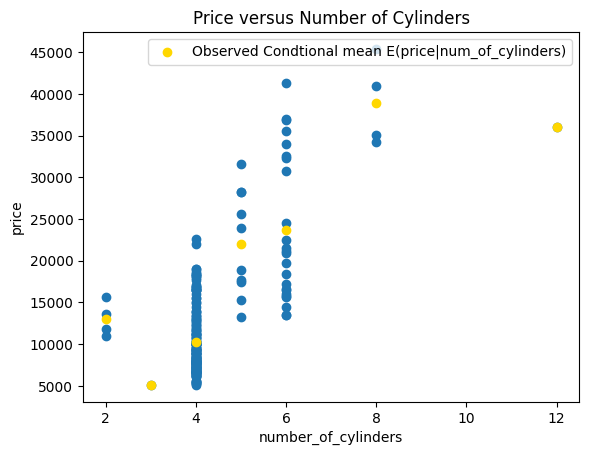

In [5]:
# Plot price versus num_of_cylinders
plt.scatter(x=data['num_of_cylinders'],y=data['price'])
plt.title('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price')

# Plot Observed Condtional mean E(price|num_of_cylinders)
num_of_cylinders = np.array(data.groupby('num_of_cylinders')['num_of_cylinders'].mean())
conditional_means = np.array(data.groupby('num_of_cylinders')['price'].mean())
plt.scatter(x=num_of_cylinders, y=conditional_means, color='gold', marker='o',label="Observed Condtional mean E(price|num_of_cylinders)")

plt.legend() 
plt.show()

<h3> OLS Regression Model </h3>

In [6]:
# Fit the linear regression model using OLS
ols_model = sm.OLS(y, X).fit()

# Display the summary of the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     200.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           5.73e-32
Time:                        20:30:07   Log-Likelihood:                -2019.7
No. Observations:                 201   AIC:                             4043.
Df Residuals:                     199   BIC:                             4050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9985.9377   1684.299  

<h4> Regression Diagnostics </h4>

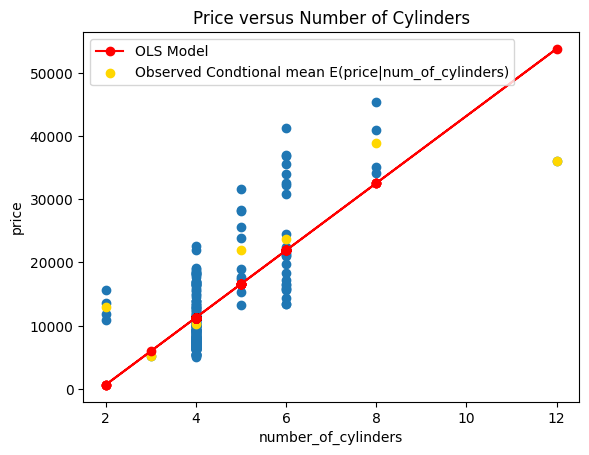

In [7]:
# Plot the OLS regression line on the scatter plot of Price versus num_of_cylinders

# Plot price versus num_of_cylinders
plt.scatter(x=data['num_of_cylinders'], y=data['price'])
plt.title('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price')
 
# Plot the OLS regression line (estimated conditional means)
y_pred_ols = ols_model.predict(X)
plt.plot(X['num_of_cylinders'], y_pred_ols, color='red', marker='o', linestyle='solid', label='OLS Model')
 
# Plot Observed Condtional mean E(price|num_of_cylinders)
num_of_cylinders = np.array(data.groupby('num_of_cylinders')['num_of_cylinders'].mean())
conditional_means = np.array(data.groupby('num_of_cylinders')['price'].mean())
plt.scatter(x=num_of_cylinders, y=conditional_means, color='gold', marker='o',label="Observed Condtional mean E(price|num_of_cylinders)")

plt.legend()
plt.show()

<h3> Median Quantile Regression Model </h3>

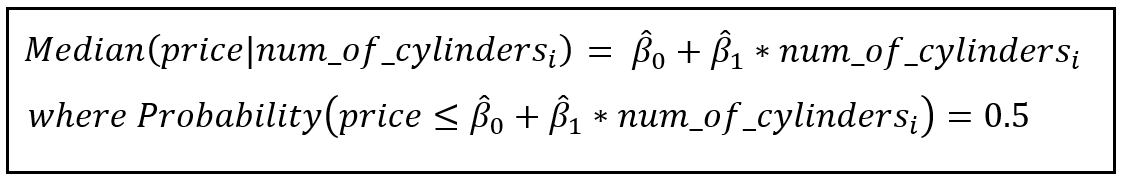

In [8]:
# Fit the linear regression model using Median QuantReg
median_model = sm.QuantReg(y,X).fit(q=0.5)

# Display the summary of the regression results
print(median_model.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2452
Model:                       QuantReg   Bandwidth:                       3963.
Method:                 Least Squares   Sparsity:                    1.064e+04
Date:                Mon, 15 Jan 2024   No. Observations:                  201
Time:                        20:30:07   Df Residuals:                      199
                                        Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.509e+04   1594.202     -9.462      0.000   -1.82e+04   -1.19e+04
num_of_cylinders  6095.0000    355.108     17.164      0.000    5394.743    6795.257


<h4> Regression Diagnostics </h4>

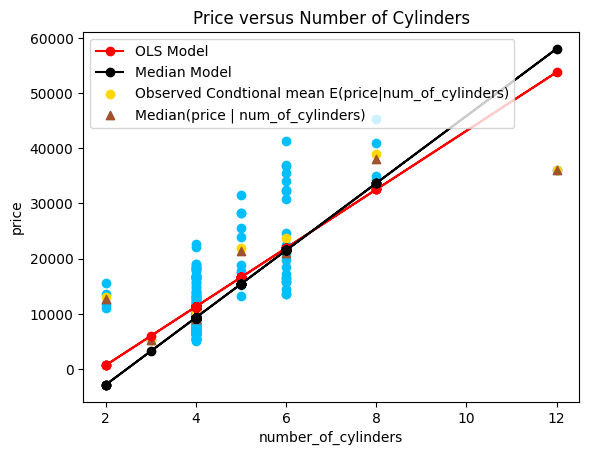

In [9]:
# Plot price versus num_of_cylinders
plt.scatter(x=data['num_of_cylinders'], y=data['price'], c='deepskyblue')
plt.title('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price')

# Plot the OLS regression line (estimated conditional means)
y_pred_ols = ols_model.predict(X)
plt.plot(X['num_of_cylinders'], y_pred_ols, color='red', marker='o', linestyle='solid', label='OLS Model')

#Plot the Median Quantile regression line (estimated conditional medians)
y_pred_median = median_model.predict(X)
plt.plot(X['num_of_cylinders'], y_pred_median, color='black', marker='o', linestyle='solid',  label='Median Model')
 
# Plot Observed Condtional means E(price|num_of_cylinders)
num_of_cylinders = np.array(data.groupby('num_of_cylinders')['num_of_cylinders'].mean())
conditional_means = np.array(data.groupby('num_of_cylinders')['price'].mean())
plt.scatter(x=num_of_cylinders, y=conditional_means, color='gold', marker='o',label="Observed Condtional mean E(price|num_of_cylinders)")

# Plot Observed conditional medians
conditional_medians = np.array(data.groupby('num_of_cylinders')['price'].median())
conditional_median_pts = plt.scatter(x=num_of_cylinders, y=conditional_medians, c='sienna', marker='^', label='Median(price | num_of_cylinders)')

plt.legend()
plt.show()

One thing we notice from the plot is that the observed values of the conditional median and conditional mean points almost overlap each other implying that the price data is more or less balanced around the mean. This is borne out by the trend lines of OLS and median regression models which are very close to each other, especially toward the center portion of the data.

<h3> Various Quantile Regression Models </h3>

In [10]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
colors = {0.1: 'orange', 0.25: 'lime', 0.5: 'yellow', 0.75: 'cyan', 0.9: 'violet'}

10th Quantile Regression Model

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.1868
Model:                       QuantReg   Bandwidth:                       3974.
Method:                 Least Squares   Sparsity:                    1.218e+04
Date:                Mon, 15 Jan 2024   No. Observations:                  201
Time:                        20:30:08   Df Residuals:                      199
                                        Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8206.5000   1748.197     -4.694      0.000   -1.17e+04   -4759.131
num_of_cylinders  3683.8750    402.717      9.148      0.000    2889.735    4478.015


25th Quantile Regression Model

                         QuantReg Regress

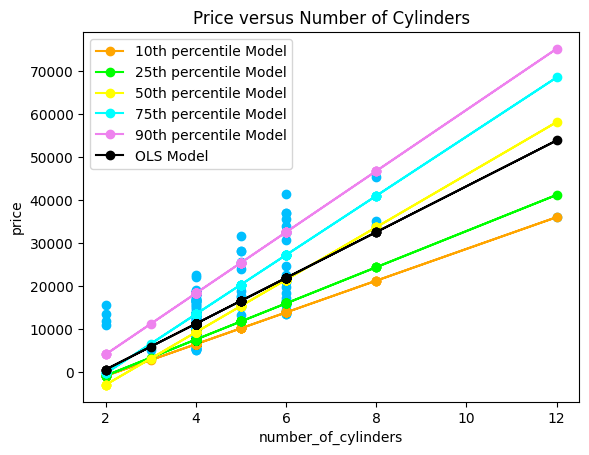

In [11]:
# Plot price versus num_of_cylinders
plt.scatter(x=data['num_of_cylinders'], y=data['price'], c='deepskyblue')
plt.title('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price')
 
coeff = []

# Build Quantile Regression Model for each quantiles
for q in quantiles:
    quantile_model = sm.QuantReg(y,X).fit(q=q)
    print(str(int(q*100))+"th Quantile Regression Model\n")
    print(quantile_model.summary())
    print("\n")
    coeff.append(quantile_model.params['num_of_cylinders'])
    y_pred_quantile = quantile_model.predict(X)
    plt.plot(X['num_of_cylinders'], y_pred_quantile, color=colors[q], marker='o', linestyle='solid',  label=str(int(q*100))+'th percentile Model')
    
# Plot the OLS regression line (estimated conditional means)
y_pred_ols = ols_model.predict(X)
plt.plot(X['num_of_cylinders'], y_pred_ols, color='black', marker='o', linestyle='solid', label='OLS Model')

plt.legend()
plt.show()

If the errors from the OLS model are identically distributed, in other words, if the errors are homoskedastic, the trend lines for all quantile models will differ only in the intercept, i.e. they will be parallel to each other. That’s clearly not what we are seeing in this case leading us to believe that the errors from the OLS model are **heteroskedastic**.

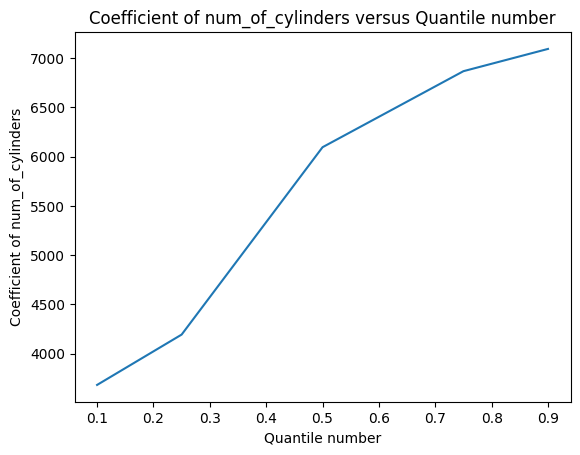

In [12]:
#Plot the coefficient of num_of_cylinders versus quantile number
plt.title('Coefficient of num_of_cylinders versus Quantile number')
plt.xlabel('Quantile number')
plt.ylabel('Coefficient of num_of_cylinders')
plt.plot(quantiles, coeff)
plt.show()

One more thing we notice is that the partial effect of num_of_cylinders on the vehicle price (i.e. the coefficient of num_of_cylinders) increases with the quantile number, indicating that the higher quantile prices are more sensitive than lower quantile prices to changes in number of cylinders.